<a href="https://colab.research.google.com/github/rafli-akbar-eka-saputra/PRAKTIKUM-KOMPUTER-GRAFIS-RAFLI-AKBAR-EKA-SAPUTRA-G.211.24.0011-/blob/main/PRAKTIKUM_7_REVISI_RAFLI_AKBAR_EKA_SAPUTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files

uploaded = files.upload()


Saving USA_Housing.csv to USA_Housing.csv


In [2]:
#Distribution of price (the predicted quantity)
df = pd.read_csv("USA_Housing.csv")
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
#correlation matrix and heatmap
df.columns



Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

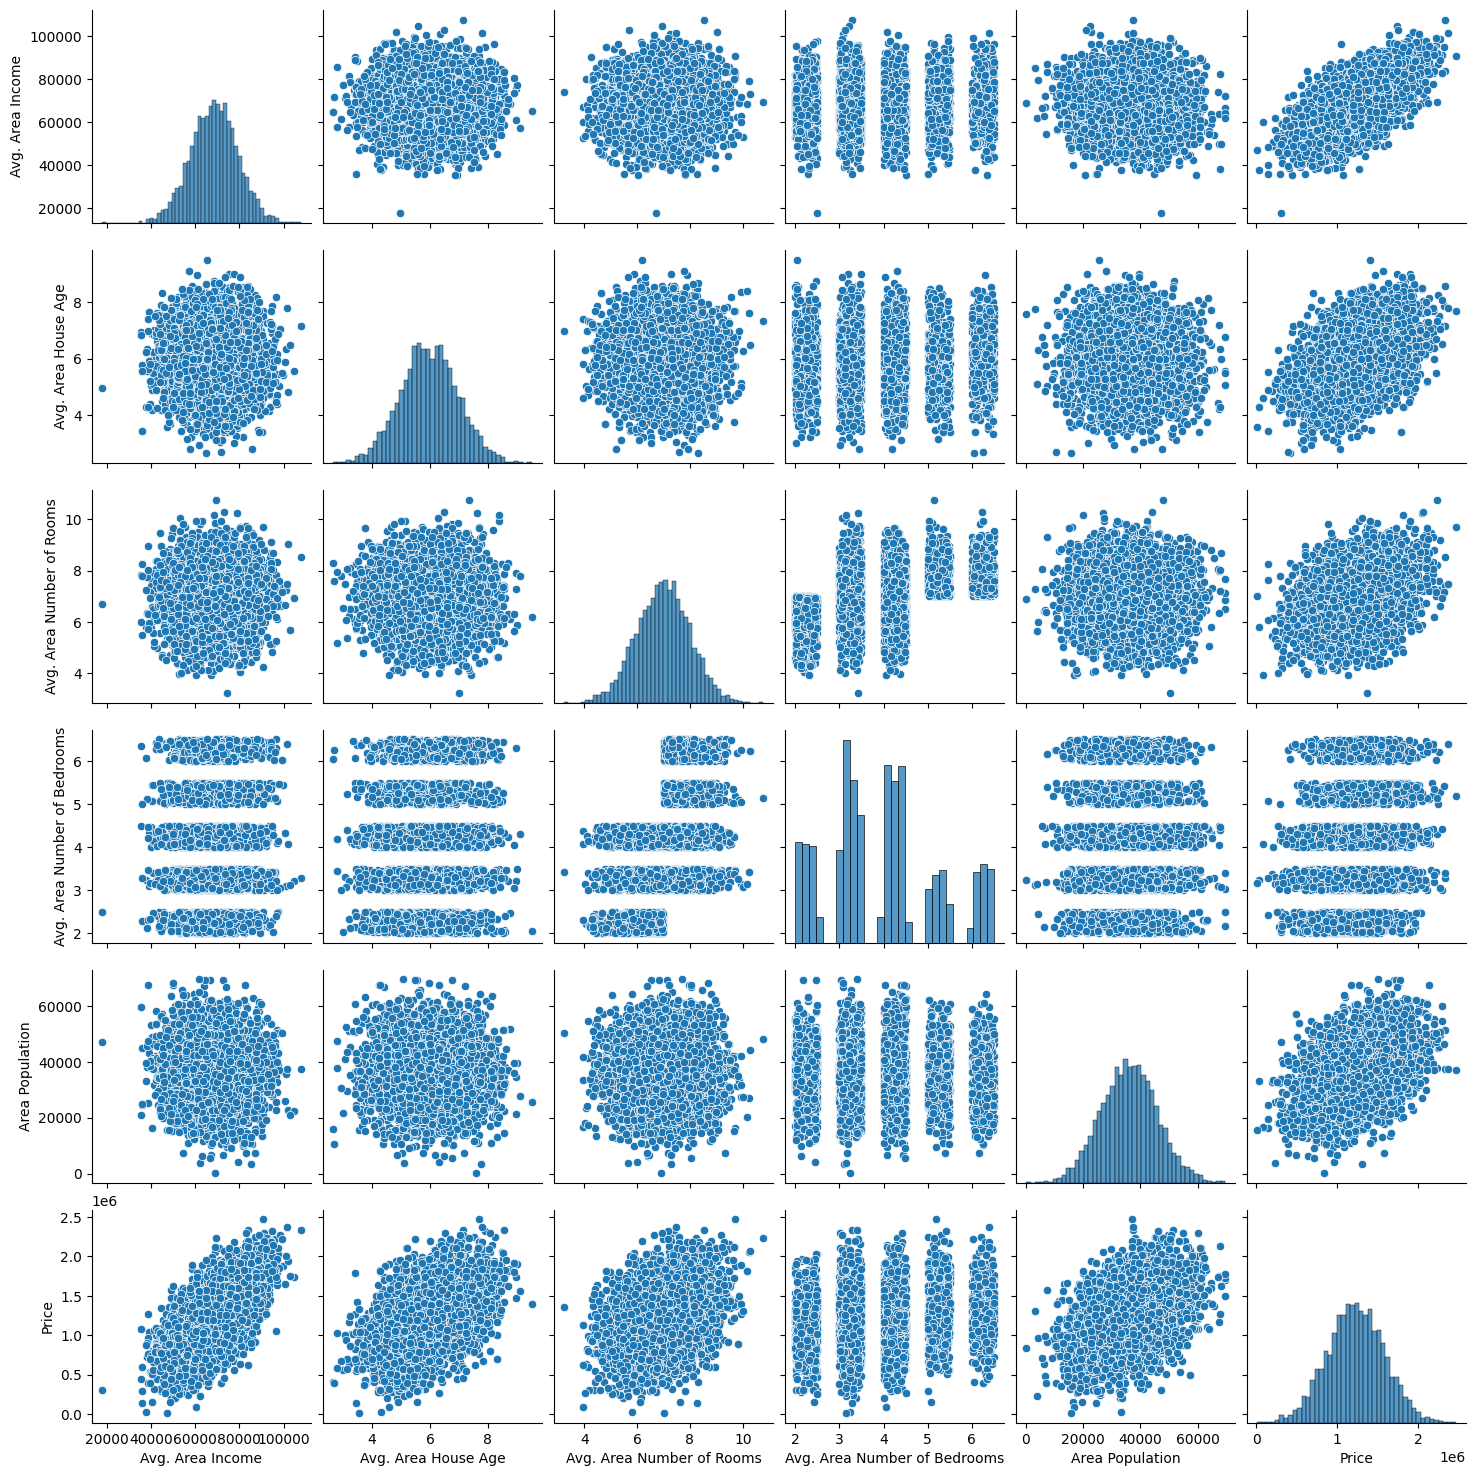

In [4]:
#Make a list of data frame column names
sns.pairplot(df)

<Axes: ylabel='Frequency'>

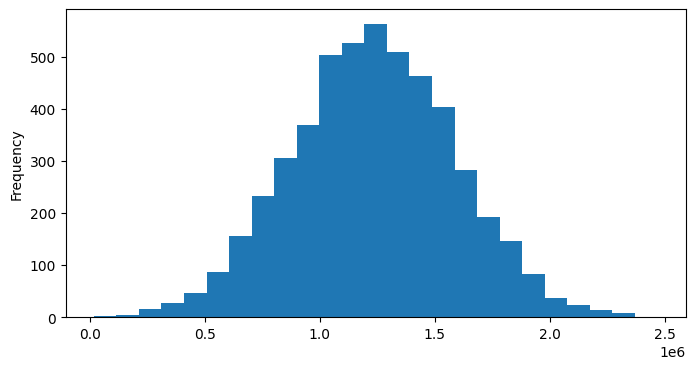

In [5]:
df['Price'].plot.hist(bins=25, figsize=(8, 4))

<Axes: ylabel='Density'>

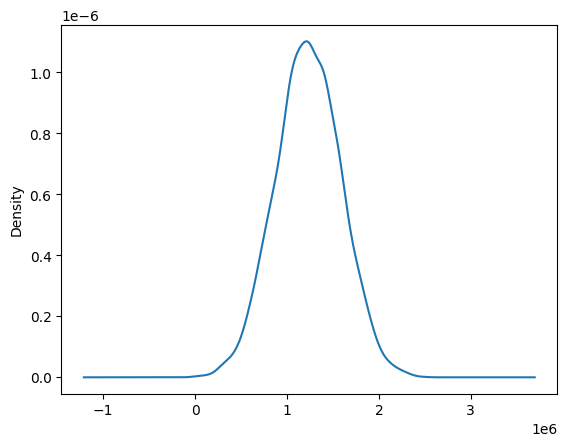

In [6]:
df['Price'].plot.density()

In [7]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr()



,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

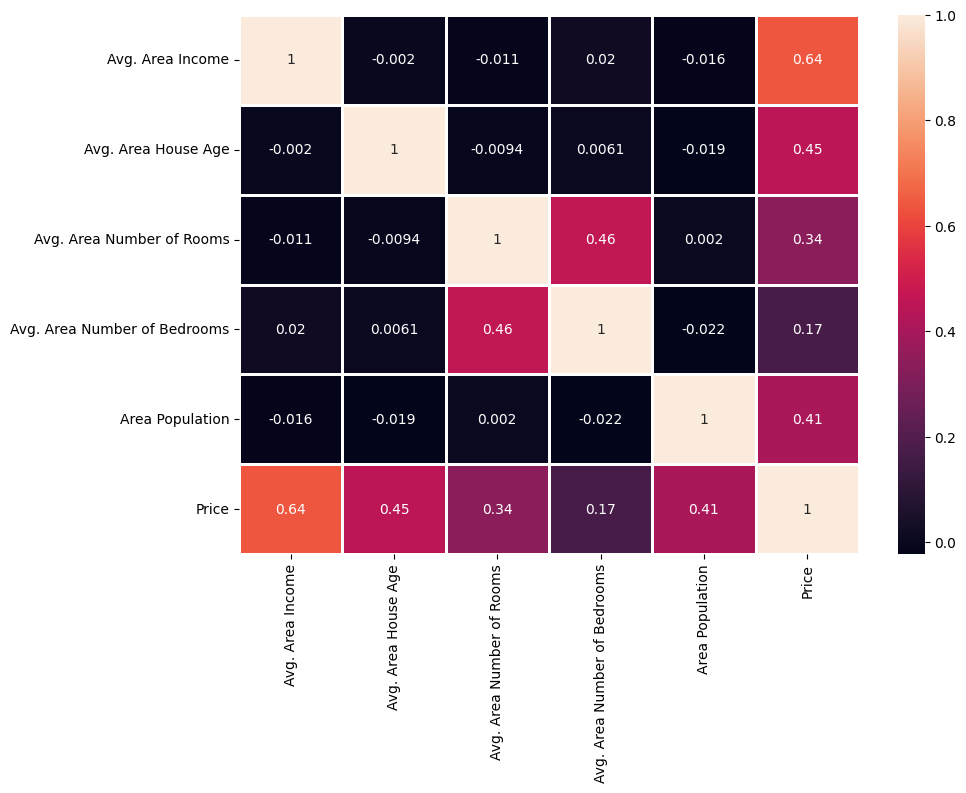

In [8]:
plt.figure(figsize=(10, 7))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2)


In [9]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column


['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [10]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]


In [11]:
print("Feature set size:", X.shape)
print("Variable set size:", y.shape)


Feature set size: (5000, 5)
Variable set size: (5000,)


In [12]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


lm = LinearRegression()


lm.fit(X_train,y_train)

LinearRegression()

In [15]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -2631028.9017454907


In [16]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [17]:
#idict = {'Coefficients': lm.intercept_}
#idf = pd.DataFrame(data=idict, index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf = pd.concat([idf, cdf], axis=0)
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


In [18]:
n = X_train.shape[0]
k = X_train.shape[1]
dfN = n-k
n_pred = lm.predict(X_train)
train_error = np.square(n_pred - y_train)
sum_error = np.sum(train_error)
se = [0, 0, 0, 0, 0]
for i in range(k):
    r = (sum_error / dfN)
    r = r / np.sum(np.square(X_train[list(X_train.columns)[i]] - X_train[list(X_train.columns)[i]].mean()))
    se[i] = np.sqrt(r)
cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Area Income,21.597602,0.160361,134.681505
Avg. Area House Age,165201.104954,1722.412068,95.912649
Avg. Area Number of Rooms,119061.463868,1696.546476,70.178722
Avg. Area Number of Bedrooms,3212.585606,1376.451759,2.333962
Area Population,15.228121,0.169882,89.639472


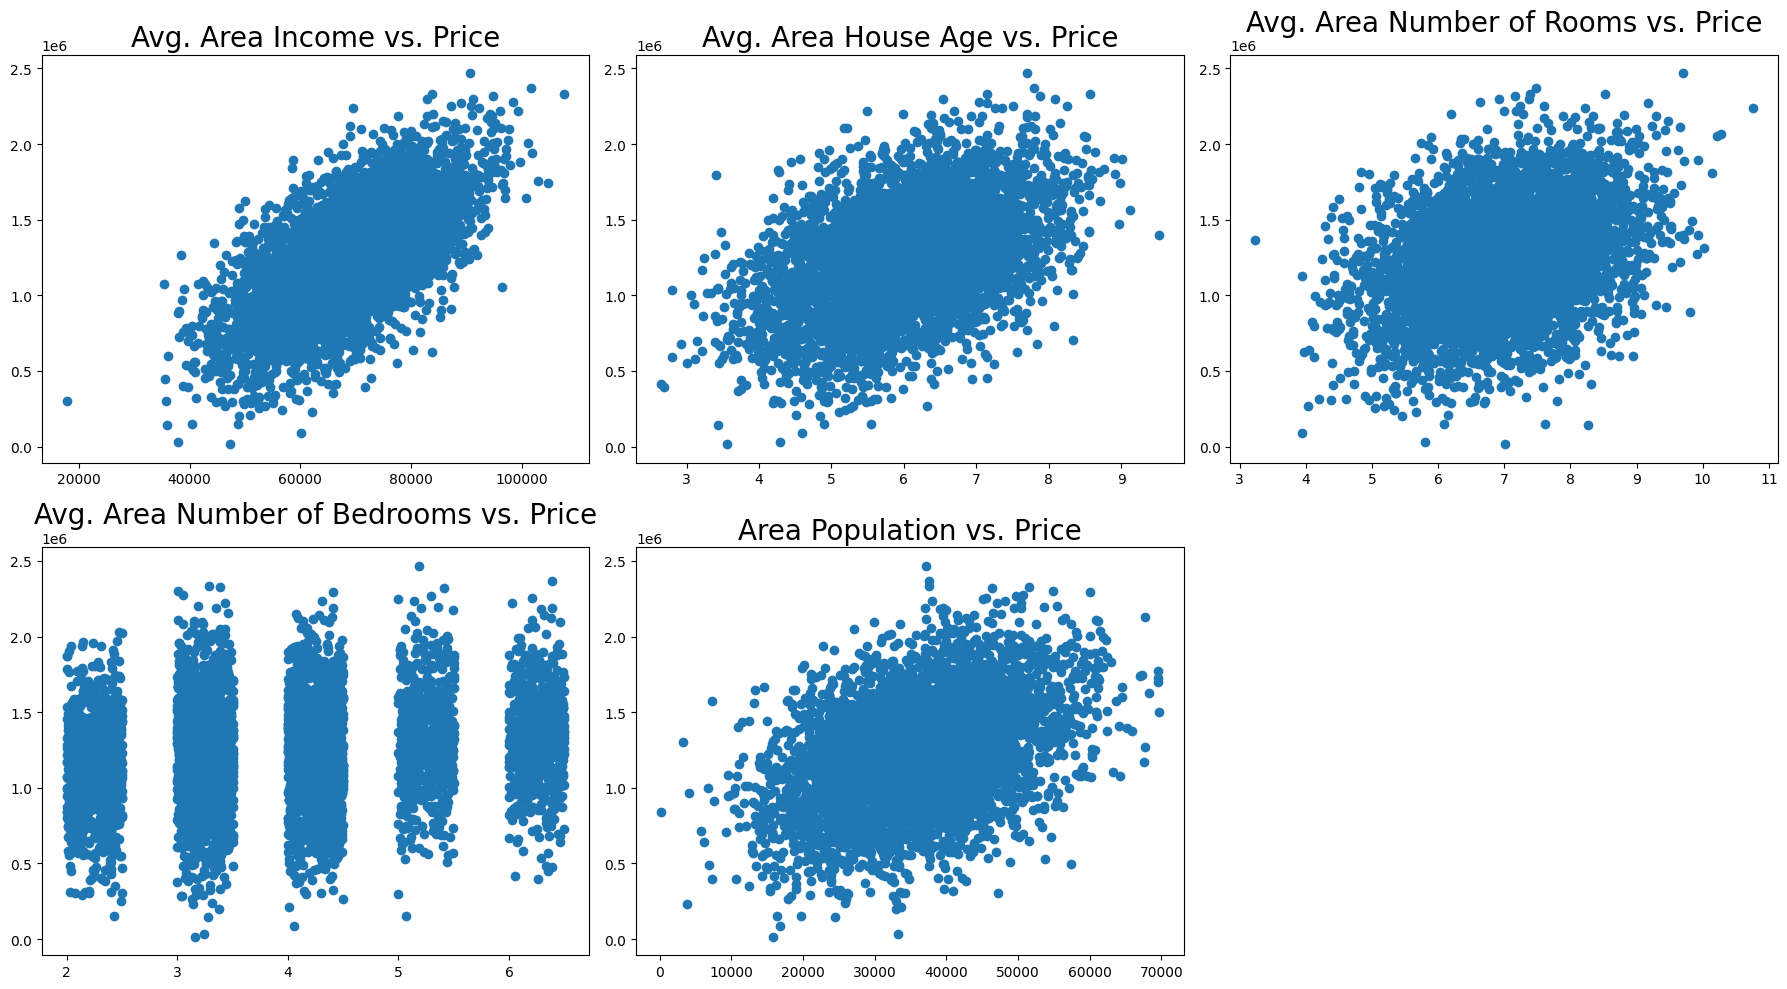

In [19]:
l = list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]], df['Price'])
ax0.set_title(l[0] + " vs. Price", fontdict={'fontsize': 20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]], df['Price'])
ax1.set_title(l[1] + " vs. Price", fontdict={'fontsize': 20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]], df['Price'])
ax2.set_title(l[2] + " vs. Price", fontdict={'fontsize': 20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]], df['Price'])
ax3.set_title(l[3] + " vs. Price", fontdict={'fontsize': 20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]], df['Price'])
ax4.set_title(l[4] + " vs. Price", fontdict={'fontsize': 20})

plt.tight_layout()

In [20]:
predictions = lm.predict(X_test)
print("Type of the predicted object:", type(predictions))
print("Size of the predicted object:", predictions.shape)


Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


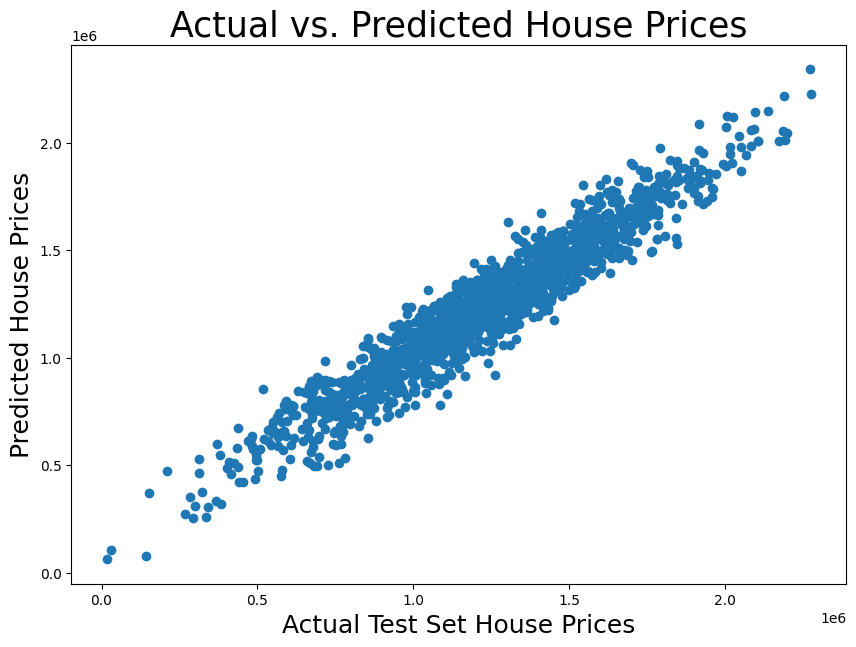

In [21]:
plt.figure(figsize=(10, 7))
plt.title("Actual vs. Predicted House Prices", fontsize=25)
plt.xlabel("Actual Test Set House Prices", fontsize=18)
plt.ylabel("Predicted House Prices", fontsize=18)
plt.scatter(x=y_test, y=predictions)

<Axes: title={'center': 'Histogram of Residuals'}, xlabel='Residuals', ylabel='Density'>

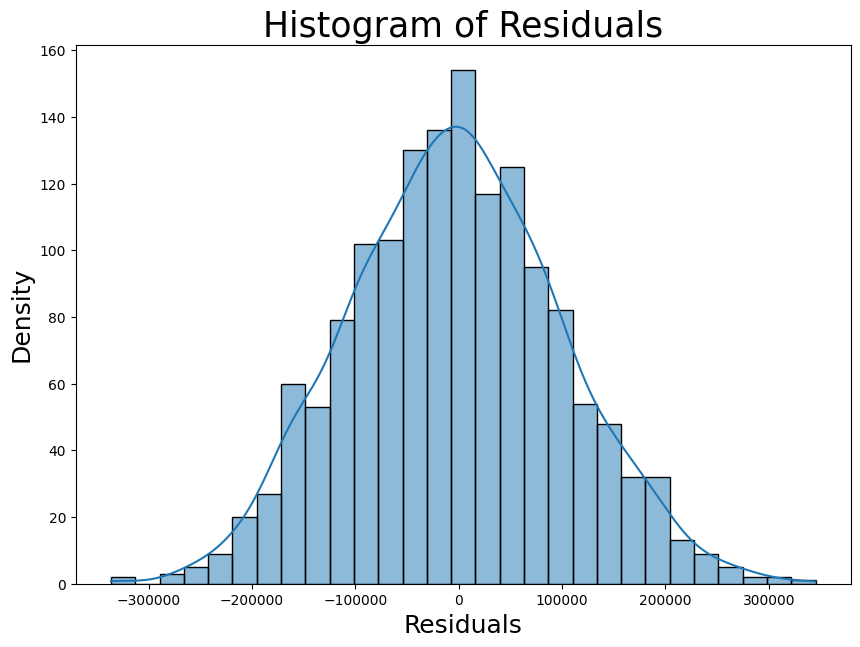

In [22]:
plt.figure(figsize=(10, 7))
plt.title("Histogram of Residuals", fontsize=25)
plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Density", fontsize=18)
sns.histplot(y_test-predictions, kde=True)

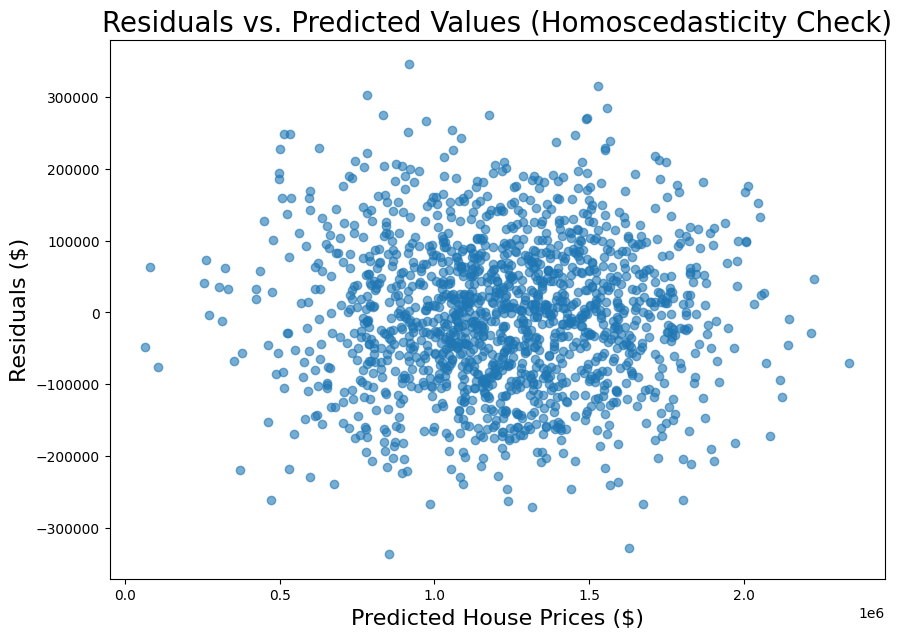

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Residuals vs. Predicted Values (Homoscedasticity Check)", fontsize=20)
plt.xlabel("Predicted House Prices ($)", fontsize=16)
plt.ylabel("Residuals ($)", fontsize=16)
plt.scatter(x=predictions, y=(y_test - predictions), alpha=0.6)

In [25]:
# Regression evaluation metrices
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))


Mean absolute error (MAE): 81739.77482718184
Mean square error (MSE): 10489638335.804983
Root mean square error (RMSE): 102418.93543581179
